<h1 style="font-family: Georgia;">Does the Degree Type Affect Post Grad Satisfaction?</h1>

![alt text](http://www.sleepsmarter.com/wp-content/uploads/sites/6/2015/06/34215806_m.jpg)

<p style="font-family: Georgia;">It is easy to say most Americans go to college in order to secure a better future for themselves. It seems as part of our culture to perputate the idea that education is a pivotal factor from which our lives will become better in the long run. Without an education, life can be become a struggle in terms of acknowledgement. The main backing behind the reason that college is so important is that it helps employers distinguish quality individuals for a job candidacy. 'College helps your career.'</p>

<p style="font-family: Georgia;">
    Indeed, the act of entering a university for the purpose of concentrating in a field that has job prospects is a productive decision to make in one's life to have a sucessful career.
</p>

<p style="font-family: Georgia;">
   Data supports the that idea, as well. Lets look at what this report by Andrea Caumont at Pew Research Center in "6 key findings about going to college" details.
</p>

![alt text](benfits.png) ![alt text](college_satis.png) ![alt text](education_worth.png) ![alt text](survey_worth.png) 

<p style="font-family: Georgia;">In her analysis, Andrea notes that 
         <blockquote>"college-educated Millennials also have lower unemployment and poverty rates than their less-educated peers"</blockquote>
         <blockquote>"Millennials with just a high school diploma are faring worse today than their counterparts in earlier generations"</blockquote>
        <blockquote>"College-educated Millennials are more likely to see themselves on a career path, rather than just working at a job to get them by."</blockquote>


<p style="font-family: Georgia;"> The report is focused on comparisons of a regular four year college experience relative to partial experience or only having a high school diploma. The value of a quantity can seem to be bigger when only aware of its relativity. It is easy to see something as huge just because its bigger than yourself instead of looking at its instrinsic value. Is that to say that these are 'bad statistics'? Not really. However, I think the data can tell another story when you inspect into the categories individually, such as the "Bachelors degree or more" </p>

![alt text](majors_matter.png)
    

<p style="font-family: Georgia;"> The amount of actual jobs that graduates (because it does not specify whether they only have a bacehlors or did grad school) were employed for that were related to their concentration generally is higher than the amount that was not relevant. However, there seems to be a trend in this discrepancy. The percentage of graduates in Science/Enigeering with irrelevant jobs is 21% v their 78%. For Business, it is 27% v 72%, and for Social Science/ Liberal Arts, it is 40% v 60%.
</p>
<br>
<p style="font-family: Georgia;"> Even though there isn't a ordinal relationship between the majors, as the fields transition from Science -> Business -> Liberal Arts the frequency of individuals who are obtaining irrelevant jobs increasing




<p style="font-family: Georgia;">Caumount even notes herself that the "College majors..\[do]..matter". 
         <blockquote>"College majors matter. Among all grads, science or engineering majors are the most likely to say their current job is very closely related to their field of study and the least likely to say that a different major would have better prepared them for the job they really wanted."</blockquote> </p>

<p style="font-family: Georgia;">All in all, it seems people with bachelors or higher have better job satisfaction proportional to people with only high school diplomas. But what about people with masters or a PHD or even a professional certificate such as a CPA certificate or Associate of the Society of Actuaries certificate.</p>

<p style="font-family: Georgia;">Thus, that is the purpose of this analysis of the 2017 National Survey of College Graduate from the United States Census using Python. </p>

<p style="font-family: Georgia;">How do Masters graduates feel about their job? Do grads wih PHD differ from grads with Bachelors with how satisfied they are with their job? Do those differences broaden or shrink when you control with their fields of study? Is there an association between degree type and job satisfaction? All of those questions and more will be answered. If you want the analysis for a specific question, you can simply click on on the table of Contents.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
#Loading InVariables and Their Meanings
place_holder = pd.read_csv("higher degrees, better satisfaction.csv", header = 0, names = 
                           ['name', 'meaning'])
#Loading in National Survey College Graduate Data # Matching the names with the variables
df = pd.read_csv("epcg17.csv", usecols = place_holder.name.tolist())

df.columns = df.columns.str.lower()
place_holder.name = place_holder.name.str.lower()

#Deciding to look at U.S colleges only

#name	meaning
#0	satadv	Satisfaction principal job's opportunities for...
#1	satben	Satisfaction principal job benefits
#2	satchal	Satisfaction principal job's intellectual chal...
#3	satind	Satisfaction principal job's degree of indepen...
#4	satloc	Satisfaction principal job's job location
#5	satresp	Satisfaction principal job's level of responsi...
#6	satsal	Satisfaction principal job salary
#7	satsec	Satisfaction principal job's job security
#8	satsoc	Satisfaction principal job's contribution to s...
#9	ndgrmed	Field of study for highest degree - best code
#10	jobins	Available benefits: health insurance
#11	jobpens	Available benefits: pension/retirement plan
#12	jobproft	Available benefits: profit-sharing plan
#13	jobsatis	Job satisfaction
#14	jobvac	Available benefits: paid vacation/sick/persona...
#15	dgrdg	Highest degree type
#16	salary	Salary (annualized)
#17	n2ocpr	Job code for principal job - best code
#18	ndgrmed	Field of study for highest degree - best code
#19	resplcus	Respondent location (U.S./Non-U.S.)
#20	hddgrus	Location of school awarding highest degree (U....
#21	hdcarn	Carnegie classification for school awarding hi...
#22	ocedrlp	Extent that principal job is related to highes...
#23	age	Age
#24	lookwk	Not working looking for work

# Respondents that had their highest degrees from US Colleges
us_colleges = df[df.hddgrus == 'Y']

In [2]:
# selecting degrees, majors, and job satisfaction
majors = us_colleges.loc[:,[ 'ndgrmed', 'dgrdg', 'jobsatis']]

In [3]:
# Matching degree codes to degrees
degrees = {1: 'Bachelors', 2: 'Masters', 3: 'Doctorate', 4: 'Professional'}
majors['degrees'] = majors.dgrdg.map(degrees)

In [4]:
# importing the field of study mapping and renaming the columns
df = pd.read_csv("field of study.txt", header = None, sep = ':')
df = df.rename(columns = {0:'code', 1:'major'})

# cleaning the mapping
df['major'] = df.major.str.replace("\d+", "").str.replace(",", "")

In [5]:
#created dictionary that maps the major code to field of study
mapped = {}
df = df.set_index('code')
mapping = df.to_dict('index')
for x,y in mapping.items():
    mapped[x] = y['major']

In [6]:
# turning codes series into string so it can match with the dictioanry
majors['field'] = majors.ndgrmed.astype('str').map(mapped)

In [7]:
#replacing the L (logical skip) wity nan
majors['jobsatis'] = majors.jobsatis.replace("L", np.nan)

In [8]:
majors['jobsatis'] = pd.to_numeric(majors.jobsatis)

In [9]:
#Seeing the median job satisfaction of degrees by field of study
majors.pivot_table('jobsatis', ['degrees', 'field'], aggfunc = np.median)

jobsatis
degrees      field                                                       
Bachelors     Accounting                                              2.0
              Actuarial science                                       1.0
              Aerospace aeronautical and astronautical engin...       2.0
              Agricultural economics                                  1.0
              Agricultural engineering                                1.0
              Animal sciences                                         2.0
              Anthropology and archaeology                            2.0
              Applied mathematics                                     2.0
              Architectural engineering                               1.0
              Architecture/Environmental Design                       2.0
              Area and Ethnic Studies                                 2.0
              Astronomy and astrophysics                              2.0
              Atmospheric sciences and meteorology                    1.5
              Audiology and speech pathology                          2.0
              Biochemistry and biophysics                             2.0
              Bioengineering and biomedical engineering               2.0
              Biology general                                         2.0
              Botany                                                  1.0
              Business administration and management                  2.0
              Business and managerial economics                       2.0
              Business general                                        2.0
              Business marketing/marketing management                 2.0
              Cell and molecular biology                              2.0
              Chemical engineering                                    2.0
              Chemistry except biochemistry                           2.0
              Civil engineering                                       1.0
              Clinical psychology                                     2.0
              Communications general                                  2.0
              Computer and information sciences                       2.0
              Computer and systems engineering                        2.0
...                                                                   ...
Masters       Physics                                                 1.0
              Physiology and pathology human and animal               2.0
              Plant sciences                                          2.0
              Political science and government                        2.0
              Pre-school/kindergarten/early childhood teache...       1.0
              Public administration                                   2.0
              Public health (including environmental health ...       2.0
              Public policy studies                                   2.0
              Science teacher education                               2.0
              Secondary teacher education                             2.0
              Social Work                                             2.0
              Social psychology                                       2.0
              Social science teacher education                        1.0
              Sociology                                               2.0
              Special education                                       2.0
              Statistics                                              2.0
              Zoology general                                         1.0
Professional  Audiology and speech pathology                          1.5
              Clinical psychology                                     1.0
              Counseling psychology                                   1.0
              Educational psychology                                  2.0
              Electrical electronics and communications engi...      

In [10]:
# Median Job Satisfaction of Bachelors By Field of Study
majors.groupby(['degrees', 'field']).agg(np.median).loc['Bachelors',:].sort_values(by = ['jobsatis'], ascending = False)

,ndgrmed,dgrdg,jobsatis
field,,,
Accounting,716510,1,2.0
Mathematics general,128420,1,2.0
OTHER business management/administrative services,716590,1,2.0
OTHER biological sciences,226420,1,2.0
OTHER FIELDS (Not Listed),769950,1,2.0
Nutritional sciences,226380,1,2.0
Nursing ( years or longer program),617870,1,2.0
Nuclear engineering,577390,1,2.0
Naval architecture and marine engineering,577380,1,2.0


In [11]:
#Amount of Bachelors in certain fields
majors[majors.degrees == 'Bachelors'].groupby('field')['field'].count().sort_values(ascending = False)

field
 Mechanical engineering                                         2167
 Electrical electronics and communications engineering          1916
 Biology general                                                1750
 General psychology                                             1663
 Nursing ( years or longer program)                             1399
 Computer science                                               1233
 Business administration and management                         1206
 Civil engineering                                              1188
 Political science and government                               1131
 Economics                                                      1130
 Sociology                                                      1013
 Chemical engineering                                            942
 Chemistry except biochemistry                                   942
 Mathematics general                                             748
 Accounting                 

In [12]:
#Had to set the merging dataframes indexes to the common column and then use concat to merge them since pd.merge gave a MemoryError
majors_merging = majors.set_index('dgrdg')
us_merging = us_colleges.set_index('dgrdg')
salaries = pd.concat([majors_merging, us_merging], axis = 1).loc[:, ['salary', 'jobsatis', 'degrees', 'field']]

In [13]:
# the amount of 9999998 is code for a logical skip, so I will simply skip the logical skip
salaries = salaries.loc[(salaries.salary != 9999998) | (salaries.salary == 0)]

In [14]:
# Visualizing the distribution of the data to figure out what measure of central tendency to use
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set()
plt.figure(figsize=(10,13))
sns.distplot(salaries.loc[salaries.degrees == 'Bachelors']['salary'].values)

In [15]:
# Since the distribution is right skewed, I would have to use the median as the measure(group the majors and find median salaries)

# Top 10 Earning Bachelors and Their Job Satisfaction
print(salaries.loc[salaries.degrees == 'Bachelors'].groupby('field').agg(np.median).sort_values(by = ['salary'], ascending = True).head(10))
print(salaries.loc[salaries.degrees == 'Bachelors'].groupby('field').agg(np.median).sort_values(by = ['salary'], ascending = False).head(10))

# Using Job Satisfaction as a measure is not helping(Need more variables)

                                                     salary  jobsatis
field                                                                
 Counselor education and guidance services          35500.0       2.0
 Pre-school/kindergarten/early childhood teache...  38000.0       2.0
 Linguistics                                        39500.0       2.0
 Counseling psychology                              40500.0       2.0
 Elementary teacher education                       40500.0       1.0
 OTHER psychology                                   42000.0       2.0
 Anthropology and archaeology                       42000.0       2.0
 Public health (including environmental health ...  42346.0       2.0
 Area and Ethnic Studies                            42390.0       2.0
 Audiology and speech pathology                     42500.0       2.0
                                                      salary  jobsatis
field                                                                 
 Petroleum enginee

In [16]:
# Salaries by Degree Type
salaries.groupby('degrees').median()

,salary,jobsatis
degrees,,
Bachelors,69468.5,2.0
Doctorate,91000.0,1.0
Masters,79000.0,2.0
Professional,105000.0,1.0


In [17]:
# Salaries by Degree Type and Field of Study

def get_salary(degree_type):
    print(salaries.loc[salaries.degrees == degree_type].groupby('field').agg(np.median).sort_values(by = ['salary'], ascending = False).head(10))
    
get_salary('Masters')
get_salary('Doctorate')

                                                      salary  jobsatis
field                                                                 
 Marketing research                                 134000.0       2.0
 Petroleum engineering                              131500.0       2.0
 Financial management                               120000.0       2.0
 Operations research                                120000.0       2.0
 Data processing                                    115000.0       2.0
 Electrical and electronic technologies             113500.0       2.0
 Computer and systems engineering                   112500.0       2.0
 Metallurgical engineering                          112000.0       2.0
 Electrical electronics and communications engi...  111000.0       2.0
 Computer science                                   110250.0       2.0
                                               salary  jobsatis
field                                                          
 Business and manage

In [18]:
#	satadv	Satisfaction principal job's opportunities for...
#1	satben	Satisfaction principal job benefits
#2	satchal	Satisfaction principal job's intellectual chal...
#3	satind	Satisfaction principal job's degree of indepen...
#4	satloc	Satisfaction principal job's job location
#5	satresp	Satisfaction principal job's level of responsi...
#6	satsal	Satisfaction principal job salary
#7	satsec	Satisfaction principal job's job security
#8	satsoc	Satisfaction principal job's contribution to s...
# jobsatis	Job satisfaction

In [19]:
# I will select all of the satisfaction variables and add them together to get a measure of overall satisfaction

#Merging majors and us_colleges so I can get the degree and major variables
overall_satis = pd.concat([majors_merging, us_merging], axis = 1)

#Selecting the specific variables
overall_satis = overall_satis.loc[:, ['degrees', 'field', 'age', 'salary', 
                                      'satadv', 'satben', 'satind', 'satloc',
                                      'satresp', 'satsal', 'satsec', 'satsoc', 'jobsatis']].iloc[:,:13]
# Replacing all Logical Skips (L) with nan values
overall_satis.replace('L', np.nan, inplace = True)

In [20]:
#Turning columns into numeric
for element in ['satadv', 'satben', 'satind', 'satloc',
                'satresp', 'satsal', 'satsec', 'satsoc']:
    overall_satis[element] = pd.to_numeric(overall_satis[element])

In [21]:
# Adding the satisfaction columns to get an overall metric
overall_drop = overall_satis.copy().dropna()
overall_drop['life_satis'] = overall_drop.iloc[:,4:].sum(axis  = 1)

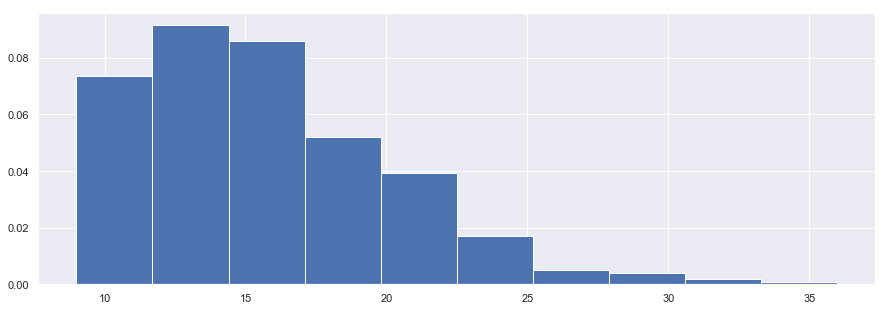

In [22]:
# Plotting histogram of life_satis meitrc
sns.set()
plt.figure(figsize=(15,5))
overall_drop['life_satis'].hist(bins = 10, density = True)

<Figure size 1440x720 with 0 Axes>

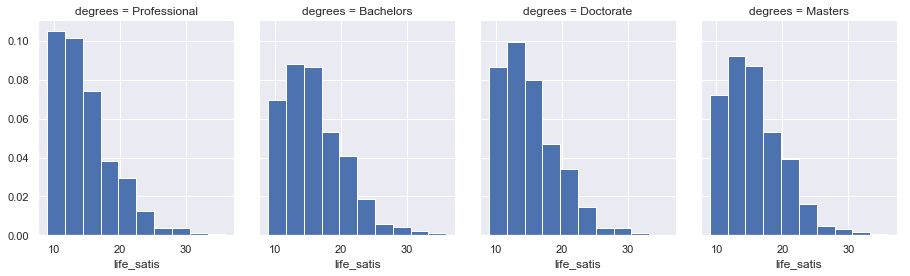

In [23]:
# Splitting the histogram by degree
plt.figure(figsize=(20,10))
  
g = sns.FacetGrid(overall_drop, col = 'degrees', height=4, aspect=.8)
g.map(plt.hist, 'life_satis', density = True, bins = 10)

In [24]:
# Median life_satis metric by degree
overall_drop.groupby('degrees')['life_satis'].median()

degrees
Bachelors       15.0
Doctorate       14.0
Masters         15.0
Professional    14.0
Name: life_satis, dtype: float64

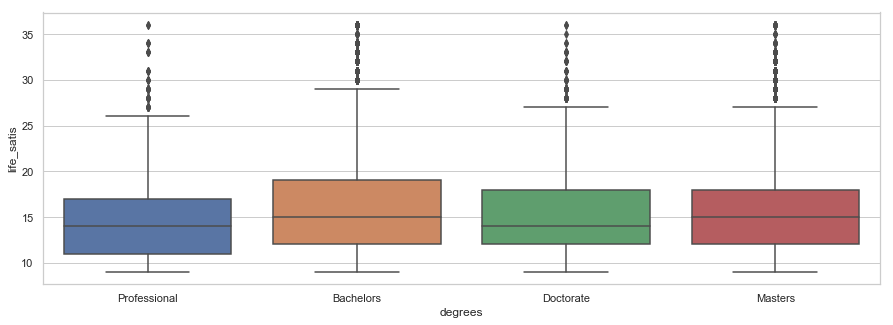

In [25]:
# Boxplot degrees v life_satis
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(data = overall_drop, x = 'degrees', y= 'life_satis')

In [26]:
### Binning Life-Satisfaction Column by first creating the life ranges and the length of list for the
### pd.cut function parameters that creates the column
life_ranges = ["{0} - {1}".format(life, life + 3) for life in range(9, 36, 3)]
count_life_ranges = len(life_ranges)

overall_drop['life_ranges'] = pd.cut(x = overall_drop['life_satis'], bins = count_life_ranges, labels = life_ranges)

In [27]:
#Finding the proportion of degrees in low(which is high) life satisfaction (lower you are, the higher)

#Created a groupby object that groups degree type and life ranges.
#Groupby simply shows the amount of life_ranges within that  of degree
overall_grouped = overall_drop.groupby(['degrees', 'life_ranges']).size()

# To obtain the proportions, I grouped by the first variable I grouped by in the multiindex([degrees, life_ranges])
# Used the apply function which iterated threw the groupby returning the overall_grouped group object divided by the sum of the
#degree group_object
overall_grouped.groupby(level = [0]).apply(lambda x:
                                                 round(100 * x / float(x.sum())))


degrees       life_ranges
Bachelors     9 - 12         27.0
              12 - 15        23.0
              15 - 18        24.0
              18 - 21        14.0
              21 - 24         6.0
              24 - 27         3.0
              27 - 30         1.0
              30 - 33         1.0
              33 - 36         0.0
Doctorate     9 - 12         32.0
              12 - 15        25.0
              15 - 18        21.0
              18 - 21        13.0
              21 - 24         5.0
              24 - 27         2.0
              27 - 30         1.0
              30 - 33         0.0
              33 - 36         0.0
Masters       9 - 12         28.0
              12 - 15        24.0
              15 - 18        24.0
              18 - 21        14.0
              21 - 24         6.0
              24 - 27         2.0
              27 - 30         1.0
              30 - 33         0.0
              33 - 36         0.0
Professional  9 - 12         38.0
              12 - 15 

In [28]:
# Getting Median LIFE SATISFACTION METRIC by degree
def get_salary_with_satisfaction(data, degree):
    df = data.loc[data.degrees == degree, ['life_satis', 'salary', 'field', 'degrees', 'satsal']]
    df = df.loc[(df.salary != 9999998)]
    return df.groupby('field')['salary', 'life_satis', 'satsal'].agg(np.median).sort_values(by = ['salary'], ascending = False).head(10)

In [29]:
print(get_salary_with_satisfaction(overall_drop, 'Bachelors'))

                                                      salary  life_satis  \
field                                                                      
 Petroleum engineering                              111300.0        15.0   
 Naval architecture and marine engineering          110750.0        16.0   
 Pharmacy                                           109000.0        14.0   
 Chemical engineering                               104000.0        15.0   
 Computer and systems engineering                   100000.0        15.5   
 Electrical electronics and communications engi...   99552.0        15.0   
 Geophysical and geological engineering              98500.0        14.0   
 Computer science                                    95000.0        15.0   
 Actuarial science                                   92501.0        13.0   
 Mining and minerals engineering                     90000.0        15.0   

                                                    satsal  
field                     

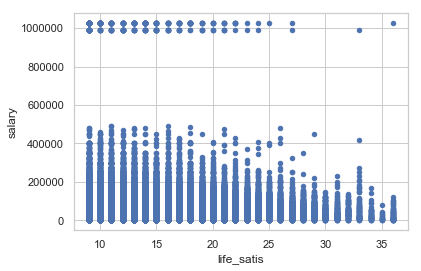

In [30]:
overall_drop.plot(kind = 'scatter', x = 'life_satis', y = 'salary')

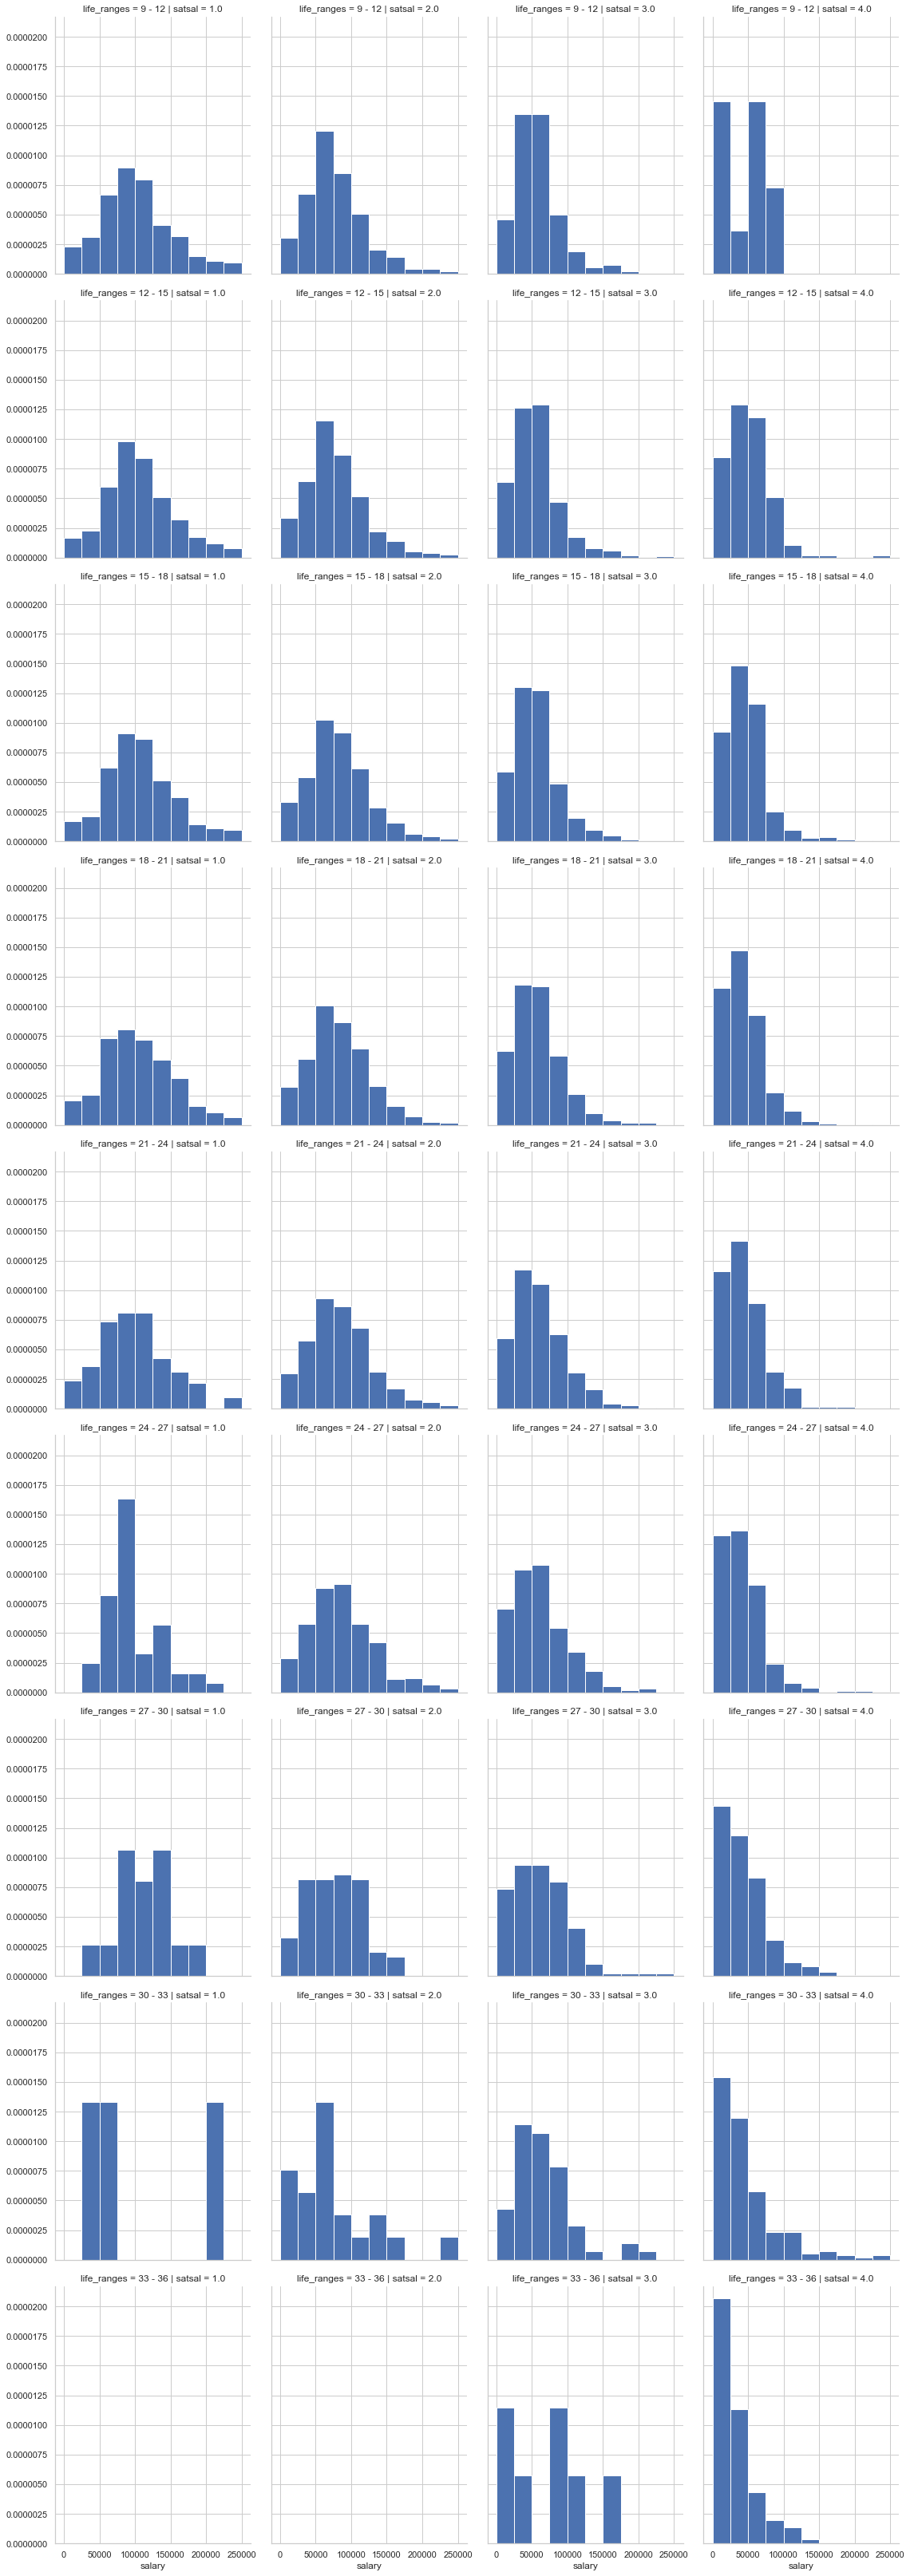

In [31]:
#Looking at distributions of salaries separated by salary satisfaction and life satisfaction(WHICH IS JOB SATISFACTION)
g = sns.FacetGrid(overall_drop.loc[(overall_drop.salary < 1000000)], col = 'satsal', row = 'life_ranges', height=5, aspect=.8)
g.map(plt.hist, 'salary', density = True, bins = 10, range = [0, 250000])

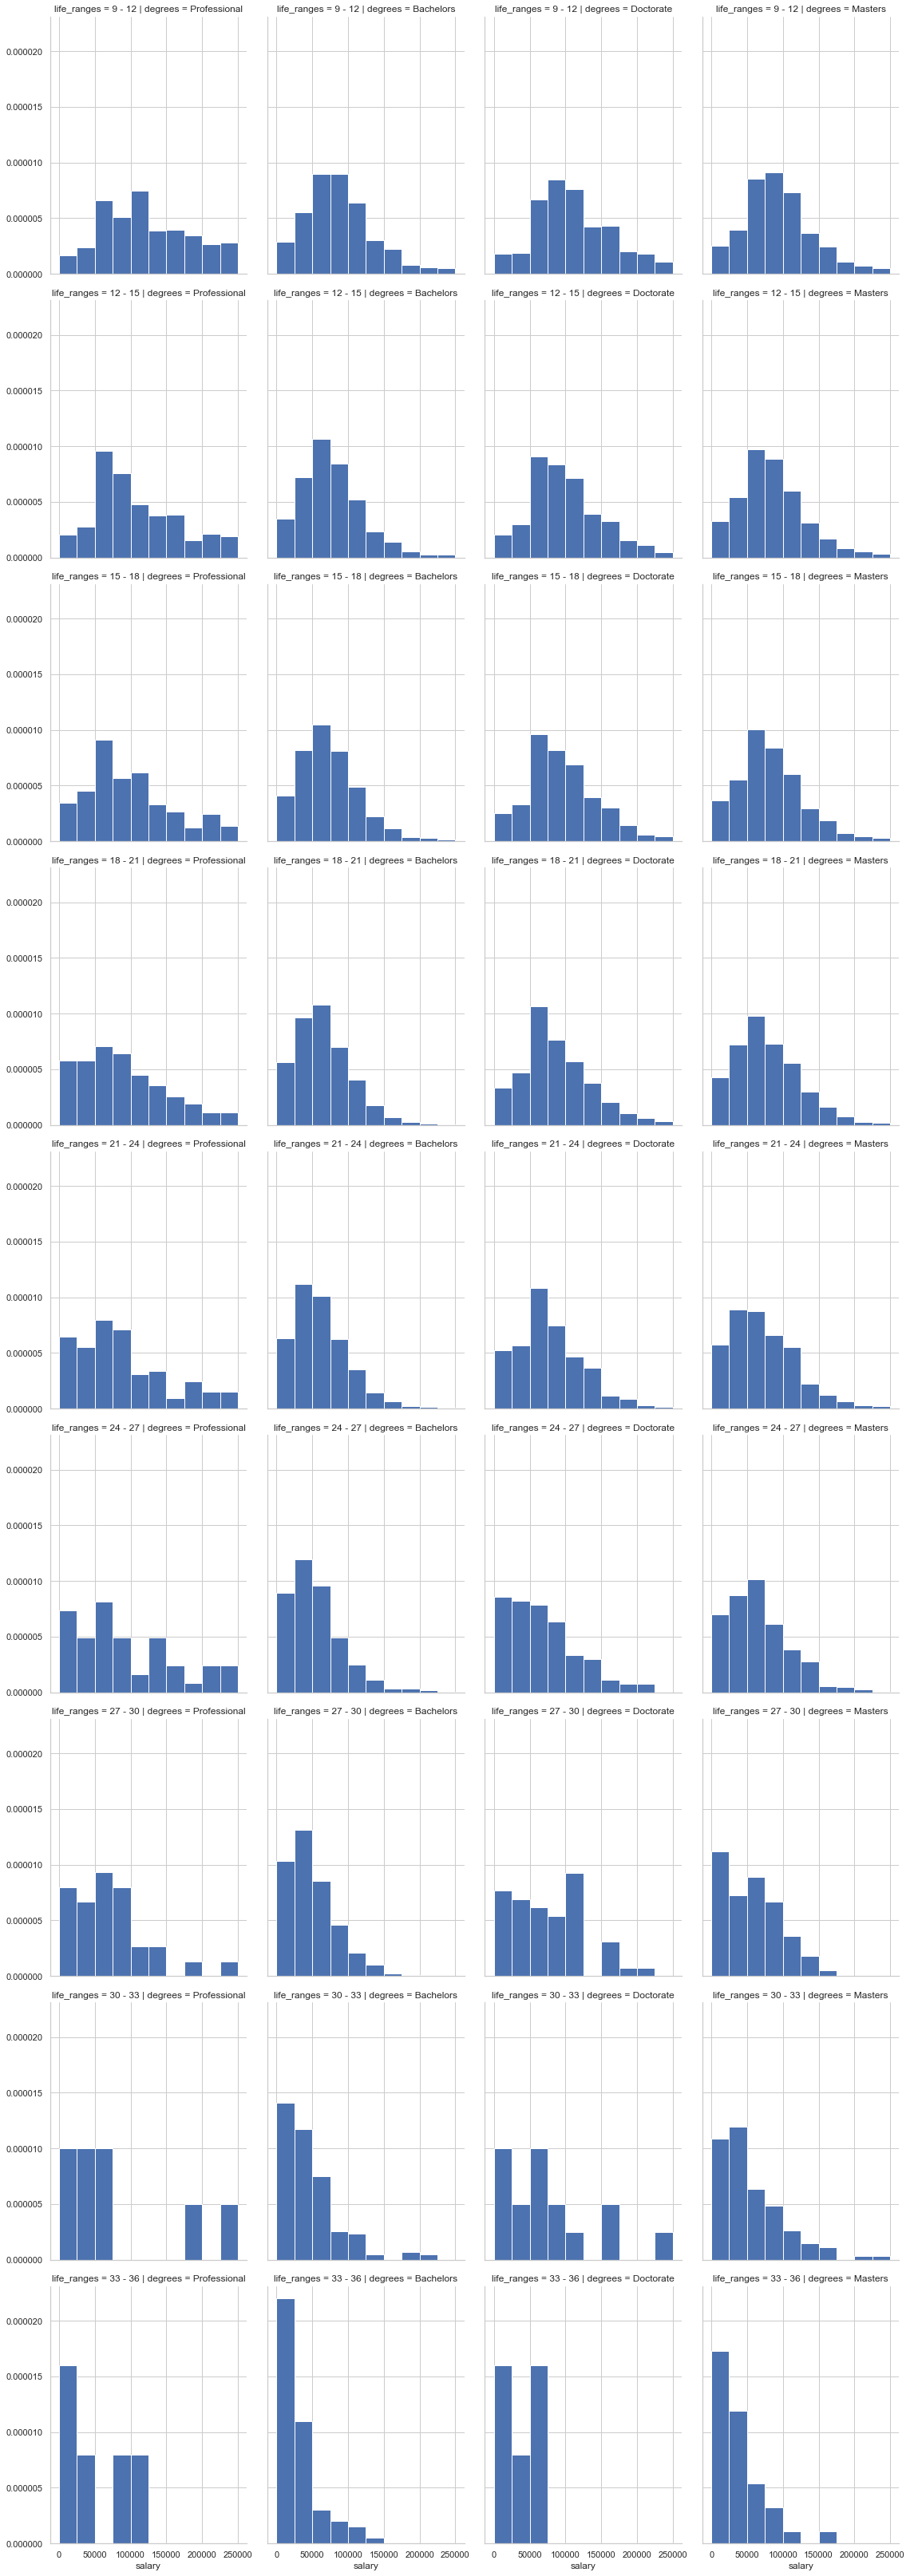

In [32]:
#Looking at distributions of salaries separated by degree type and life satisfaction(WHICH IS JOB SATISFACTION)
g = sns.FacetGrid(overall_drop.loc[(overall_drop.salary < 1000000)], col = 'degrees', row = 'life_ranges', height=5, aspect=.8)
g.map(plt.hist, 'salary', density = True, bins = 10, range = [0, 250000])

In [35]:
#10	jobins	Available benefits: health insurance
#11	jobpens	Available benefits: pension/retirement plan
#12	jobproft	Available benefits: profit-sharing plan
#13	jobsatis	Job satisfaction
#14	jobvac	Available benefits: paid vacation/sick/persona...

#Digging a bit deeper into job situations by degrees by making percentages of people who have certain benefits based on degree
job_df = pd.concat([majors_merging, us_merging], axis = 1)

def percents_by_variable(data, variable, amount):
    grouped = data.groupby([variable, amount]).size()
    return grouped.groupby(level = [0]).apply(lambda x:
                                                 round(100 * x / float(x.sum())))
job_df.replace('L', np.nan, inplace = True)

#Percentages of benefits
insurance = percents_by_variable(job_df, 'degrees', 'jobins')
vacations = percents_by_variable(job_df, 'degrees', 'jobvac')
retire = percents_by_variable(job_df, 'degrees', 'jobpens')

In [ ]:
#Running ChiSquare Test of Association between degrees and Life Satisfaction(which is really job satisfaction)

#Creating contingency tables
table = pd.crosstab(overall_drop.degrees,overall_drop.life_satis)

#Running test to get the p values, chi squared statistic
chi2_contingency(table)

In [37]:
retire['Bachelors']

jobpens
N    24.0
Y    76.0
dtype: float64